# Titanic EDA

## Step 1: Reading the data

Variable |	Definition|	Key|
--|--|--|
survival|	Survival|	0 = No, 1 = Yes|
pclass	|Ticket class|	1 = 1st(upper), 2 = 2nd(middle), 3 = 3rd(lower)|
sex	|Sex|	
Age|	Age in years|	
sibsp|	# of siblings / spouses aboard the Titanic	|
parch|	# of parents / children aboard the Titanic	|
ticket|	Ticket number	|
fare	|Passenger fare	|
cabin	|Cabin number	|
embarked|	Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

In [1]:
# import package for working with data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns

In [2]:
# import dataset
titanic = pd.read_csv('train.csv')
titanic = titanic.set_index('PassengerId')

In [3]:
# check 5 first rows
titanic.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# check shape
titanic.shape

(891, 11)

In [5]:
# check types
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


## Step 2: Cleaning the data

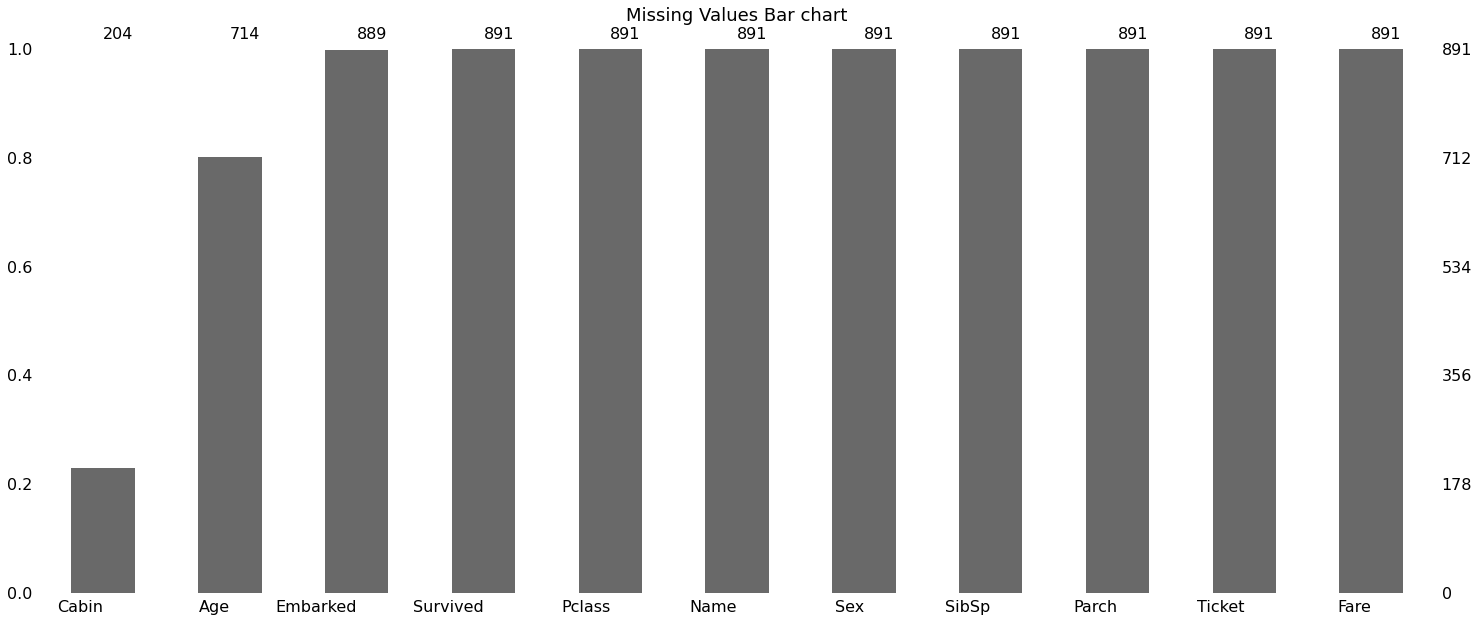

In [6]:
# Create a bar chart showing how many missing values are in each column
msno.bar(titanic, labels=True, label_rotation=0, sort='ascending')
plt.title('Missing Values Bar chart', size = 18);

In [7]:
# Which column has the most NaN values? How many cells in that column are empty?
titanic.isna().sum().sort_values(ascending=False)[[0]]

Cabin    687
dtype: int64

In [8]:
# Delete all rows where Embarked is empty
titanic.dropna(subset=['Embarked'], inplace=True)

In [9]:
# check shape after remove Embarked NA
titanic.shape

(889, 11)

In [10]:
# Fill all empty cabins with ¯\(ツ)/¯
titanic.fillna(value={'Cabin':'¯\(ツ)/¯'}, inplace = True)

In [11]:
# check dataset after fillna
titanic.sample(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
216,1,1,"Newell, Miss. Madeleine",female,31.0,1,0,35273,113.275,D36,C
162,1,2,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",female,40.0,0,0,C.A. 33595,15.750,¯\(ツ)/¯,S
476,0,1,"Clifford, Mr. George Quincy",male,NaN,0,0,110465,52.000,A14,S
437,0,3,"Ford, Miss. Doolina Margaret ""Daisy""",female,21.0,2,2,W./C. 6608,34.375,¯\(ツ)/¯,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000,B42,S


## Step 3: Feature extraction

In [12]:
# There are two columns that pertain to how many family members are on the boat for a given person.
# Create a new column called FamilyCount which will be the sum of those two columns.
titanic['FamilyCount'] = titanic['SibSp'] + titanic['Parch']

In [13]:
# check sum of FamilyCount that works correctly
titanic[['SibSp', 'Parch', 'FamilyCount']].sample(5)

,SibSp,Parch,FamilyCount
PassengerId,,,
320,1,1,2
276,1,0,1
12,0,0,0
481,5,2,7
600,1,0,1


In [14]:
# Reverends have a special title in their name.
# Create a column called IsReverend: 1 if they're a preacher, 0 if they're not.
titanic['IsReverend'] = np.where(titanic['Name'].str.contains("Rev")==True, 1, 0)

In [15]:
# Extract the title from everyone's name and create dummy columns
titanic['TitleName'] = titanic['Name'].str.extract(r'([A-Z][a-z]+\.)')

In [16]:
# Uniques Title Name on the boat
titanic['TitleName'].unique()

array(['Mr.', 'Mrs.', 'Miss.', 'Master.', 'Don.', 'Rev.', 'Dr.', 'Mme.',
       'Ms.', 'Major.', 'Lady.', 'Sir.', 'Mlle.', 'Col.', 'Capt.',
       'Countess.', 'Jonkheer.'], dtype=object)

In [17]:
# In order to feed our training data into a classification algorithm,
# we need to convert our categories into 1's and 0's using pd.get_dummies
dummies = pd.get_dummies(titanic[['Embarked', 'Sex', 'TitleName']])
dummies.columns

Index(['Embarked_C', 'Embarked_Q', 'Embarked_S', 'Sex_female', 'Sex_male',
       'TitleName_Capt.', 'TitleName_Col.', 'TitleName_Countess.',
       'TitleName_Don.', 'TitleName_Dr.', 'TitleName_Jonkheer.',
       'TitleName_Lady.', 'TitleName_Major.', 'TitleName_Master.',
       'TitleName_Miss.', 'TitleName_Mlle.', 'TitleName_Mme.', 'TitleName_Mr.',
       'TitleName_Mrs.', 'TitleName_Ms.', 'TitleName_Rev.', 'TitleName_Sir.'],
      dtype='object')

In [18]:
# Merge dummies and dataset
titanic_dummies = pd.concat([titanic, dummies], axis = 1)
titanic_dummies.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,TitleName_Major.,TitleName_Master.,TitleName_Miss.,TitleName_Mlle.,TitleName_Mme.,TitleName_Mr.,TitleName_Mrs.,TitleName_Ms.,TitleName_Rev.,TitleName_Sir.
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,¯\(ツ)/¯,...,0,0,0,0,0,1,0,0,0,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,1,0,0,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,¯\(ツ)/¯,...,0,0,1,0,0,0,0,0,0,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,1,0,0,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,¯\(ツ)/¯,...,0,0,0,0,0,1,0,0,0,0


## Step 4: Exploratory analysis

In [19]:
# What was the survival rate overall?
round(titanic['Survived'].mean(), 2)

0.38

In [20]:
# Which gender fared the worst? What was their survival rate?
titanic.groupby(['Sex'])[['Fare', 'Survived']].mean()

,Fare,Survived
Sex,,
female,44.252124,0.740385
male,25.523893,0.188908


In [21]:
#What was the survival rate for each Pclass?
titanic.groupby(['Pclass'])[['Survived']].mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [22]:
# Did any reverends survive? How many?
titanic.groupby(['TitleName'])['Survived'].get_group('Rev.').sum()
titanic[titanic['TitleName'] == 'Rev.']['Survived'].sum()

0

In [23]:
# What is the survival rate for cabins marked ¯\(ツ)/¯
round(titanic[titanic['Cabin'] == '¯\(ツ)/¯']['Survived'].mean(), 2)

0.3

In [24]:
# What is the survival rate for people whose Age is empty?
round(titanic[titanic['Age'].isna()]['Survived'].mean(), 2)

0.29

In [25]:
# What is the survival rate for each port of embarkation?
round(titanic.groupby(['Embarked'])[['Survived']].mean(),2)

,Survived
Embarked,
C,0.55
Q,0.39
S,0.34


In [26]:
# What is the survival rate for children (under 12) in each Pclass?
round(titanic[titanic['Age'] < 12].groupby(['Pclass'])['Survived'].mean(), 2)

Pclass
1    0.75
2    1.00
3    0.40
Name: Survived, dtype: float64

In [27]:
# Did the captain of the ship survive? Is he on the list?
titanic[titanic['TitleName'] == 'Capt.'][['TitleName', 'Name', 'Survived']]

,TitleName,Name,Survived
PassengerId,,,
746,Capt.,"Crosby, Capt. Edward Gifford",0


In [28]:
# Of all the people that died, who had the most expensive ticket? How much did it cost?
titanic[(titanic['Survived']==0)].sort_values('Fare', ascending=False).head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilyCount,IsReverend,TitleName
PassengerId,,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0,C23 C25 C27,S,5,0,Mr.
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0,C23 C25 C27,S,5,0,Mr.


In [29]:
# Does having family on the boat help or hurt your chances of survival?
titanic.groupby(['FamilyCount'])[['Survived']].mean().sort_values('Survived',ascending=False).head(5)

,Survived
FamilyCount,
3,0.724138
2,0.578431
1,0.552795
6,0.333333
0,0.300935


# Step 5: Plotting
Using Matplotlib and Seaborn, create several charts showing the survival rates of different groups of people. It's fine if a handful of charts are basic (Gender, Age, etc), but what we're really looking for is something beneath the surface.

In [30]:
# Set Style
sns.set_style("whitegrid")

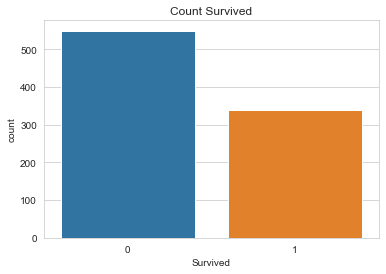

In [31]:
# Survival count
sns.countplot(x='Survived', data=titanic).set_title('Count Survived');

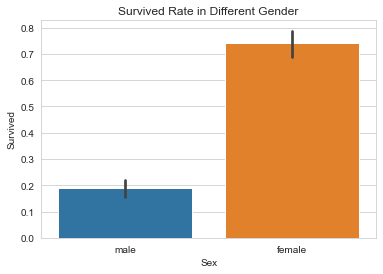

In [32]:
# Survival rate for each gender
sns.barplot(x='Sex', y='Survived', data=titanic).set_title('Survived Rate in Different Gender');

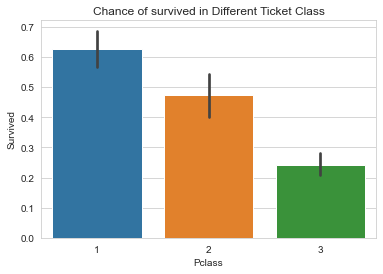

In [33]:
# Survival rate for each Pclass
sns.barplot(x='Pclass', y='Survived', data=titanic).set_title('Chance of survived in Different Ticket Class');

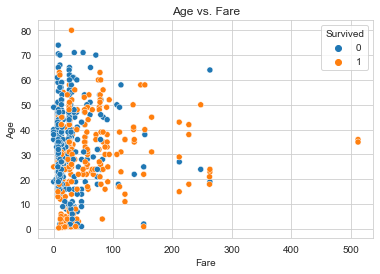

In [34]:
# Age and Fare split by Survived
sns.scatterplot(x='Fare', y='Age', hue='Survived', data=titanic).set_title('Age vs. Fare');

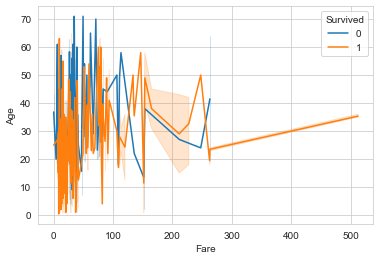

In [63]:
# Linechart fare
sns.lineplot(x='Fare', y='Age', data=titanic, hue='Survived');

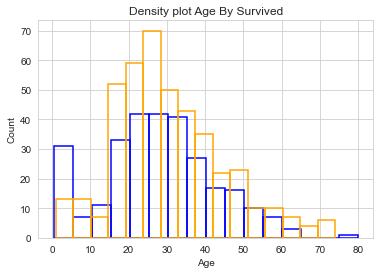

In [60]:
# Density plot who is Survived split by Age
sns.histplot(titanic[titanic['Survived']==1]['Age'],color='b', fill=False)
sns.histplot(titanic[titanic['Survived']==0]['Age'], color='orange', fill =False)
plt.title('Density plot Age By Survived');

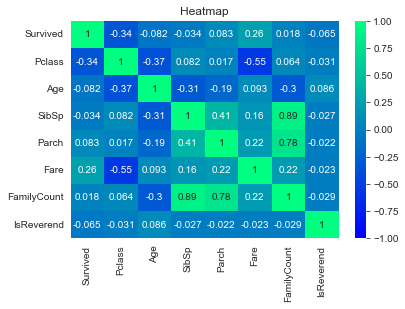

In [61]:
# Heatmap
corr = titanic.corr()
sns.heatmap(corr, annot=True, cmap='winter', vmin=-1, vmax=1)
plt.title('Heatmap');